<a href="https://colab.research.google.com/github/DariyaSavva/Machine-Learning/blob/main/Dataset_Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пропущенных значений в таблице данных:  0


,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00,8368.00
mean,4.01,60.21,47.90,3218.25,36190.62,10.05,523.01,174.77,5.52,5.51,29.49,29.24,656070.56
std,0.58,17.40,14.34,1824.90,18630.15,5.52,277.22,72.00,2.58,2.59,20.03,20.00,267413.74
min,3.00,30.00,25.00,604.00,5277.00,1.00,50.00,50.01,1.00,1.00,0.00,0.00,184708.52
25%,3.50,45.00,35.49,1889.00,22592.50,5.00,277.00,113.31,3.30,3.20,13.00,13.00,454651.40
50%,4.00,60.00,45.53,2846.50,32518.50,10.00,528.00,173.91,5.50,5.60,27.00,26.00,604242.08
75%,4.50,75.00,60.30,4008.50,44566.25,15.00,764.25,237.41,7.80,7.80,43.00,43.00,813094.23
max,5.00,90.00,76.00,9978.00,103777.00,19.00,999.00,299.98,10.00,10.00,88.00,88.00,1531867.55



ИНТЕРПРЕТАЦИЯ ЧИСЛОВЫХ ХАРАКТЕРИСТИК:

ОБЩИЙ АНАЛИЗ:
Все числовые переменные демонстрируют значительный разброс значений, что свидетельствует о разнообразии ресторанов в выборке.
Есть выбросы почти для всех параметров, чаще всего выбросы - это рестораны с очень высокими показателями по размеру выручки,
количеству подписчиков и т.д. По многим параметрам в выборке наблюдается правосторонняя ассиметрия в сторону более успешных ресторанов.

АНАЛИЗ ЦЕЛЕВОГО ПОКАЗАТЕЛЯ ВЫРУЧКИ (Revenue):
Стандартное отклонение 267 413.74 очень велико, что означает большой разброс
ресторанов с разным уровнем дохода, как ниже так, и выше среднего.
Так как средняя выручка: 656 070.56 больше медианы 604,242.08, то 
распределение правостороннее - то есть в выборке чаще представлены
рестораны с более высоким уровнем дохода

АНАЛИЗ КОНКРЕТНЫХ ПОКАЗАТЕЛЕЙ РЕСТОРАНОВ:

Вместимость ресторанов распределена симметрично - среднее значение 60.21
практически совпадает с медианой 60.00. Типичный ресторан имеет от 45 до 75 

,Location,Cuisine,Parking Availability
count,8368,8368,8368
unique,3,6,2
top,Downtown,French,Yes
freq,2821,1433,4189


(6276, 2092)

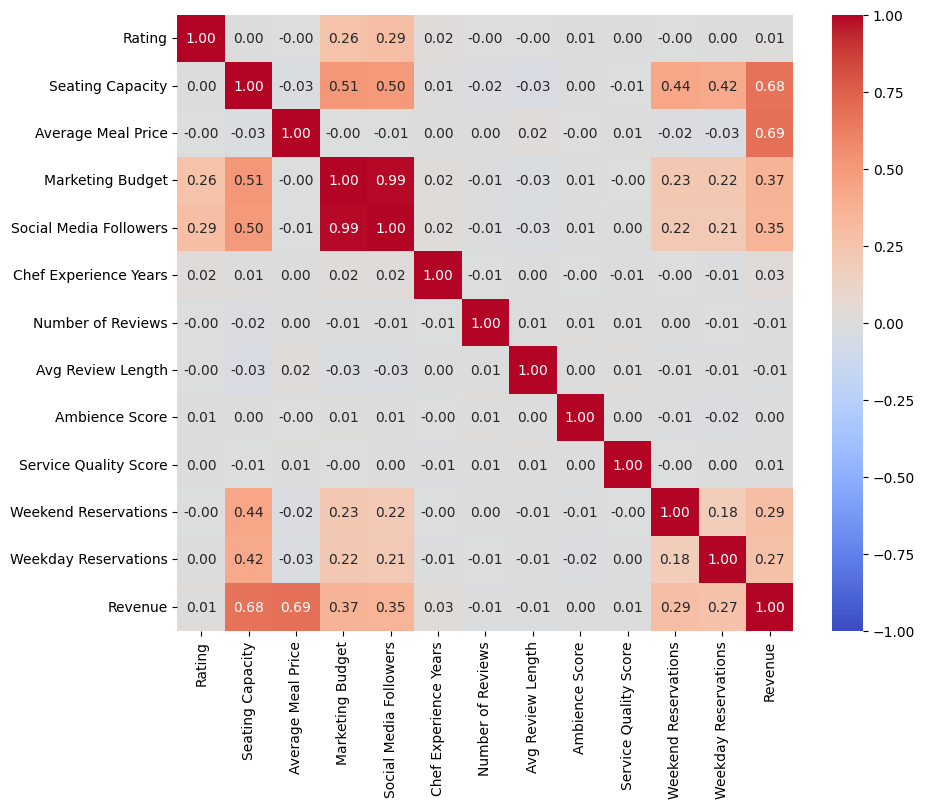

In [22]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from IPython.display import display
import io
import os

url = "https://raw.githubusercontent.com/DariyaSavva/Machine-Learning/main/restaurant_data.csv"
data_raw = pd.read_csv(url)


data_raw["Cuisine"] = data_raw["Cuisine"].astype('category')
data_raw["Location"] = data_raw["Location"].astype('category')
data_raw["Parking Availability"] = data_raw["Parking Availability"].astype('category')

#data_raw.info()
#data_raw = data_raw.set_index('Name')
#data_raw.info()



# выводим матрицу корелляции
corr_mat = data_raw.corr(numeric_only=True)
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
# интерпретация:

#проверили, что нет пропущенных значений
not_is_null_value = (data_raw.isnull().sum().sum() == 0)
print("Пропущенных значений в таблице данных: ", data_raw.isnull().sum().sum())

# выводим числовые признаки
description = data_raw.describe()
styled_table = description.style
styled_table = data_raw.describe().style\
    .format('{:.2f}')\
    .set_caption('characteristics of numerical features:')
display(styled_table)
# интерпретация:
print("""
ИНТЕРПРЕТАЦИЯ ЧИСЛОВЫХ ХАРАКТЕРИСТИК:

ОБЩИЙ АНАЛИЗ:
Все числовые переменные демонстрируют значительный разброс значений, что свидетельствует о разнообразии ресторанов в выборке.
Есть выбросы почти для всех параметров, чаще всего выбросы - это рестораны с очень высокими показателями по размеру выручки,
количеству подписчиков и т.д. По многим параметрам в выборке наблюдается правосторонняя ассиметрия в сторону более успешных ресторанов.

АНАЛИЗ ЦЕЛЕВОГО ПОКАЗАТЕЛЯ ВЫРУЧКИ (Revenue):
Стандартное отклонение 267 413.74 очень велико, что означает большой разброс
ресторанов с разным уровнем дохода, как ниже так, и выше среднего.
Так как средняя выручка: 656 070.56 больше медианы 604,242.08, то
распределение правостороннее - то есть в выборке чаще представлены
рестораны с более высоким уровнем дохода

АНАЛИЗ КОНКРЕТНЫХ ПОКАЗАТЕЛЕЙ РЕСТОРАНОВ:

Вместимость ресторанов распределена симметрично - среднее значение 60.21
практически совпадает с медианой 60.00. Типичный ресторан имеет от 45 до 75 мест,
что соответствует межквартильному диапазону.

Маркетинговый бюджет ресторанов демонстрирует правостороннюю асимметрию распределения:
среднее значение 3,218.25 превышает медиану 2,846.50 на 371.75. Это указывает на то,
что некоторые рестораны инвестируют в продвижение значительно больше среднего, формируя
"хвост" распределения в сторону высоких значений.

Еще более выраженная асимметрия наблюдается в показателях социальных сетей. Количество подписчиков имеет
среднее значение 36 190.62 при медиане 32 518.50, что создает разницу в 3 672.12.
Такой значительный разрыв между средним и медианой свидетельствует о наличии "звездных" ресторанов с огромной аудиторией
в социальных сетях, которые существенно влияют на общую статистику.

Качественные характеристики - рейтинг, оценки атмосферы и обслуживания - распределены относительно равномерно,
хотя и с некоторым смещением в сторону более высоких оценок. Например, средний рейтинг 4.01 при возможном максимуме 5.0 указывает на то,
что в целом рестораны из выборки получают хорошие оценки. Оценки атмосферы и обслуживания более разнообразны в выборке,
так как среднее значение около 5.5 по десятибальной шкале.

ВЫВОДЫ ДЛЯ ML-МОДЕЛИ:
1. Требуется обработка выбросов в Revenue, Marketing Budget
2. Рекомендуется нормализация данных из-за большого разброса
3. Возможна мультиколлинеарность между некоторыми признаками
""")

display(data_raw.describe(include=['category']))

# for column in data_raw.columns:
#     data_raw.plot(kind='scatter', x=column, y='Revenue')


X = data_raw.drop(['Revenue'], axis=1)
y = data_raw['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test